In [2]:
import numpy as np

# -*- coding: utf-8 -*-
"""
example on how to plot decoded sensor data from crazyflie
@author: jsschell
"""
import cfusdlog
import matplotlib.pyplot as plt
import re
import argparse
import seaborn as sns
import pandas as pd

In [19]:
filename = '/media/mht/crazyflie/log25'

# decode binary log data
logData = cfusdlog.decode(filename)
logData = logData['fixedFrequency']
# df = pd.DataFrame.from_dict(logData)
print(logData.keys())
# logData['stateEstimate.z']

dict_keys(['timestamp', 'stabilizer.roll', 'stabilizer.pitch', 'stabilizer.yaw', 'stateEstimateZ.x', 'stateEstimateZ.y', 'stateEstimateZ.z', 'stateEstimate.vx', 'stateEstimate.vy', 'stateEstimate.vz', 'stateEstimateZ.rateRoll', 'stateEstimateZ.ratePitch', 'stateEstimateZ.rateYaw', 'motor.m1req', 'motor.m2req', 'motor.m3req', 'motor.m4req', 'ctrlMel.cmd_yaw', 'ctrlMel.i_err_mx', 'ctrlMel.i_err_my', 'ctrlMel.i_err_mz'])


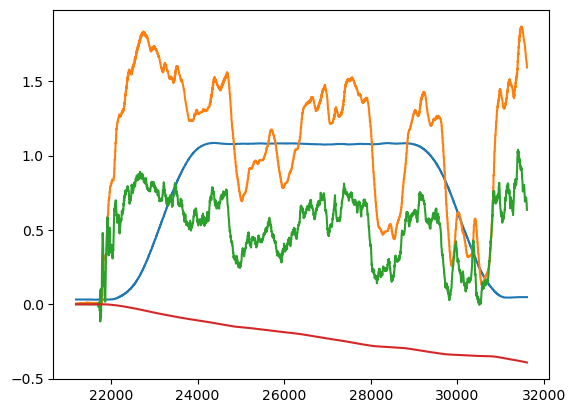

In [21]:
# sns.lineplot(data=df, x='timestamp', y=['motor.m1req', 'stateEstimate.z'])
plt.plot(logData['timestamp'], logData['stateEstimateZ.z'] / 1000)
# plt.plot(logData['timestamp'], logData['motor.m2req'])
# plt.plot(logData['timestamp'], logData['motor.m3req'])
plt.plot(logData['timestamp'], logData['stabilizer.yaw'])
plt.plot(logData['timestamp'], logData['ctrlMel.cmd_yaw'] / 5000) 
plt.plot(logData['timestamp'], logData['ctrlMel.i_err_mz']) 
# plt.plot(logData['stateEstimate.qw']) 

In [18]:
cmd = logData['ctrlMel.cmd_thrust']
np.nonzero(cmd)[0][0]

120

In [34]:
idx = 1400

quaternions = np.array([logData['stateEstimate.qx'][idx],
                        logData['stateEstimate.qy'][idx],
                        logData['stateEstimate.qz'][idx],
                        logData['stateEstimate.qw'][idx]])
rpy = np.array([logData['stabilizer.roll'][idx],
                        logData['stabilizer.pitch'][idx],
                        logData['stabilizer.yaw'][idx]])
quaternions

from scipy.spatial.transform import Rotation

s = Rotation.from_quat(quaternions)
print(s.as_euler('XYZ') / np.pi * 180, rpy)

[-0.80024212 -8.16573447  1.60183356] [-1.03788173  8.13910675  1.73280013]


In [ ]:
#only focus on regular logging


# set window background to white
plt.rcParams['figure.facecolor'] = 'w'
    
# number of columns and rows for suplot
plotCols = 1
plotRows = 1

# let's see which keys exists in current data set
keys = ""
for k, v in logData.items():
    keys += k

# get plot config from user
plotGyro = 0
if re.search('gyro', keys):
    inStr = input("plot gyro data? ([Y]es / [n]o): ")
    if ((re.search('^[Yy]', inStr)) or (inStr == '')):
        plotGyro = 1
        plotRows += 1

plotAccel = 0
if re.search('acc', keys):
    inStr = input("plot accel data? ([Y]es / [n]o): ")
    if ((re.search('^[Yy]', inStr)) or (inStr == '')):
        plotAccel = 1
        plotRows += 1

plotBaro = 0
if re.search('baro', keys):
    inStr = input("plot barometer data? ([Y]es / [n]o): ")
    if ((re.search('^[Yy]', inStr)) or (inStr == '')):
        plotBaro = 1
        plotRows += 1

plotCtrl = 0
if re.search('ctrltarget', keys):
    inStr = input("plot control data? ([Y]es / [n]o): ")
    if ((re.search('^[Yy]', inStr)) or (inStr == '')):
        plotCtrl = 1
        plotRows += 1

plotStab = 0
if re.search('stabilizer', keys):
    inStr = input("plot stabilizer data? ([Y]es / [n]o): ")
    if ((re.search('^[Yy]', inStr)) or (inStr == '')):
        plotStab = 1
        plotRows += 1
    
# current plot for simple subplot usage
plotCurrent = 0

# new figure
plt.figure(0)

if plotGyro:
    plotCurrent += 1
    plt.subplot(plotRows, plotCols, plotCurrent)
    plt.plot(logData['timestamp'], logData['gyro.x'], '-', label='X')
    plt.plot(logData['timestamp'], logData['gyro.y'], '-', label='Y')
    plt.plot(logData['timestamp'], logData['gyro.z'], '-', label='Z')
    plt.xlabel('timestamp [ms]')
    plt.ylabel('Gyroscope [°/s]')
    plt.legend(loc=9, ncol=3, borderaxespad=0.)
 
if plotAccel:
    plotCurrent += 1
    plt.subplot(plotRows, plotCols, plotCurrent)
    plt.plot(logData['timestamp'], logData['acc.x'], '-', label='X')
    plt.plot(logData['timestamp'], logData['acc.y'], '-', label='Y')
    plt.plot(logData['timestamp'], logData['acc.z'], '-', label='Z')
    plt.xlabel('timestamp [ms]')
    plt.ylabel('Accelerometer [g]')
    plt.legend(loc=9, ncol=3, borderaxespad=0.)
 
if plotBaro:
    plotCurrent += 1
    plt.subplot(plotRows, plotCols, plotCurrent)
    plt.plot(logData['timestamp'], logData['baro.pressure'], '-')
    plt.xlabel('timestamp [ms]')
    plt.ylabel('Pressure [hPa]')
    
    plotCurrent += 1
    plt.subplot(plotRows, plotCols, plotCurrent)
    plt.plot(logData['timestamp'], logData['baro.temp'], '-')
    plt.xlabel('timestamp [ms]')
    plt.ylabel('Temperature [degC]')

if plotCtrl:
    plotCurrent += 1
    plt.subplot(plotRows, plotCols, plotCurrent)
    plt.plot(logData['timestamp'], logData['ctrltarget.roll'], '-', label='roll')
    plt.plot(logData['timestamp'], logData['ctrltarget.pitch'], '-', label='pitch')
    plt.plot(logData['timestamp'], logData['ctrltarget.yaw'], '-', label='yaw')
    plt.xlabel('timestamp [ms]')
    plt.ylabel('Control')
    plt.legend(loc=9, ncol=3, borderaxespad=0.)

if plotStab:
    plotCurrent += 1
    plt.subplot(plotRows, plotCols, plotCurrent)
    plt.plot(logData['timestamp'], logData['stabilizer.roll'], '-', label='roll')
    plt.plot(logData['timestamp'], logData['stabilizer.pitch'], '-', label='pitch')
    plt.plot(logData['timestamp'], logData['stabilizer.yaw'], '-', label='yaw')
    plt.plot(logData['timestamp'], logData['stabilizer.thrust'], '-', label='thrust')
    plt.xlabel('timestamp [ms]')
    plt.ylabel('Stabilizer')
    plt.legend(loc=9, ncol=4, borderaxespad=0.)

plt.show()
